In [163]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [164]:
dataset = pd.read_csv('train.csv', encoding='latin')
sample = pd.read_csv('test.csv', encoding='latin')

In [165]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


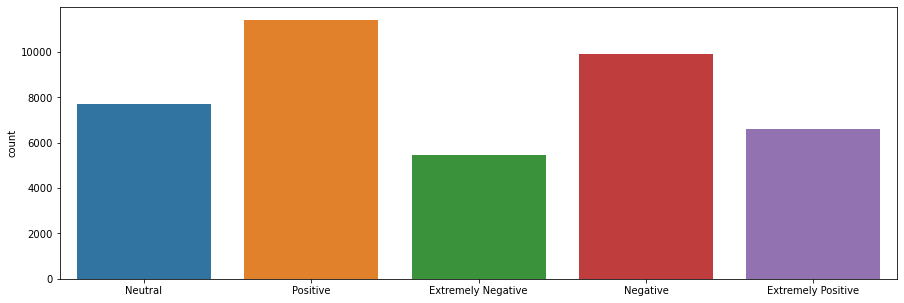

In [166]:
plt.figure(figsize=(15,5))
sns.countplot(x = dataset['Sentiment'].values)
le = LabelEncoder()
dataset['Sentiment'] = le.fit_transform(dataset['Sentiment'])

In [167]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,4
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [168]:
stop_word = stopwords.words('english')

In [169]:
def clean(text):
    text = text.lower()
    #remove urls
    text = re.sub(r'http\S+', " ", text)
    #remove mentions
    text = re.sub(r'@\w+',' ',text)
    #remove hastags
    text = re.sub(r'#\w+', ' ', text)
    #remove digits
    text = re.sub(r'\d+', ' ', text)
    #remove html tags
    text = re.sub('r<.*?>',' ', text)
    #remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    return text

In [170]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: clean(x))
sample['OriginalTweet'] = sample['OriginalTweet'].apply(lambda x: clean(x))

In [171]:
dataset = dataset.iloc[:,4:]
dataset.head(20)

,OriginalTweet,Sentiment
0,,3
1,advice talk neighbours family exchange phone n...,4
2,coronavirus australia: woolworths give elderly...,4
3,"food stock one empty... please, panic, enough ...",4
4,"me, ready go supermarket outbreak. i'm paranoi...",0
5,news regionâs first confirmed covid- case cam...,4
6,cashier grocery store sharing insights prove c...,4
7,supermarket today. buy toilet paper.,3
8,due covid- retail store classroom atlanta open...,4
9,"corona prevention,we stop buy things cash use ...",2


In [172]:
X = dataset['OriginalTweet']
y = dataset['Sentiment']
print(X.shape,y.shape,sample.shape)

(41157,) (41157,) (3798, 5)


In [173]:
model = ["Logistic Regression","Random Forest"]
acc = []
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("X_train : ", x_train.shape)
print("X_test  : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test  : ", y_test.shape)

X_train :  (32925, 10000)
X_test  :  (8232, 10000)
Y_train :  (32925,)
Y_test  :  (8232,)


In [174]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred)
acc.append(lr_accuracy)
print("Training accuracy Score    : ",lr_clf.score(x_train,y_train))
print("Validation accuracy Score  : ",lr_accuracy)
print("Classification report\n",classification_report(y_pred,y_test))

Training accuracy Score    :  0.7694457099468489
Validation accuracy Score  :  0.5805393586005831
Classification report
               precision    recall  f1-score   support

           0       0.48      0.64      0.55       817
           1       0.53      0.68      0.59      1028
           2       0.53      0.52      0.52      2004
           3       0.70      0.65      0.67      1666
           4       0.63      0.53      0.57      2717

    accuracy                           0.58      8232
   macro avg       0.57      0.60      0.58      8232
weighted avg       0.59      0.58      0.58      8232



In [175]:
confusion_matrix(y_test, y_pred)

array([[ 522,   14,  444,   42,   72],
       [   4,  699,   39,   34,  555],
       [ 244,   49, 1047,  250,  396],
       [  12,   11,  170, 1075,  258],
       [  35,  255,  304,  265, 1436]], dtype=int64)

In [176]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(x_train,y_train)

rf_prediction = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
acc.append(rf_accuracy)
print("Training accuracy Score    : ",rf_clf.score(x_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9994836750189825
Validation accuracy Score :  0.5468901846452867
              precision    recall  f1-score   support

           0       0.44      0.63      0.52       773
           1       0.44      0.63      0.52       941
           2       0.48      0.52      0.50      1829
           3       0.75      0.58      0.65      1967
           4       0.58      0.49      0.53      2722

    accuracy                           0.55      8232
   macro avg       0.54      0.57      0.54      8232
weighted avg       0.57      0.55      0.55      8232



In [177]:
confusion_matrix(y_test,rf_prediction)

array([[ 484,   27,  376,   72,  135],
       [   9,  591,   67,   55,  609],
       [ 205,   60,  947,  341,  433],
       [  18,   13,  146, 1142,  207],
       [  57,  250,  293,  357, 1338]], dtype=int64)

In [178]:
Samp = sample['OriginalTweet']
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
Samp = tfidf.fit_transform(Samp)
output = lr_clf.predict(Samp)
output = le.inverse_transform(output)
print(output)

['Neutral' 'Neutral' 'Positive' ... 'Neutral' 'Neutral' 'Negative']


In [179]:
rows=[]
k=0
for i in sample['UserName'].values:
  temp=[]
  temp.append(i)
  temp.append(output[k])
  k+=1
  rows.append(temp)

In [185]:
for i in range(25):
  print(rows[i])
print(len(rows))
import csv
fields = ['UserName','Sentiment']
filename = "Output.csv"

with open(filename, 'w',newline="") as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

[1, 'Neutral']
[2, 'Neutral']
[3, 'Positive']
[4, 'Neutral']
[5, 'Neutral']
[6, 'Neutral']
[7, 'Neutral']
[8, 'Positive']
[9, 'Neutral']
[10, 'Neutral']
[11, 'Negative']
[12, 'Positive']
[13, 'Positive']
[14, 'Extremely Positive']
[15, 'Negative']
[16, 'Neutral']
[17, 'Negative']
[18, 'Positive']
[19, 'Neutral']
[20, 'Neutral']
[21, 'Neutral']
[22, 'Neutral']
[23, 'Positive']
[24, 'Negative']
[25, 'Positive']
3798


In [190]:
result = pd.read_csv('Output.csv')

<AxesSubplot:ylabel='count'>

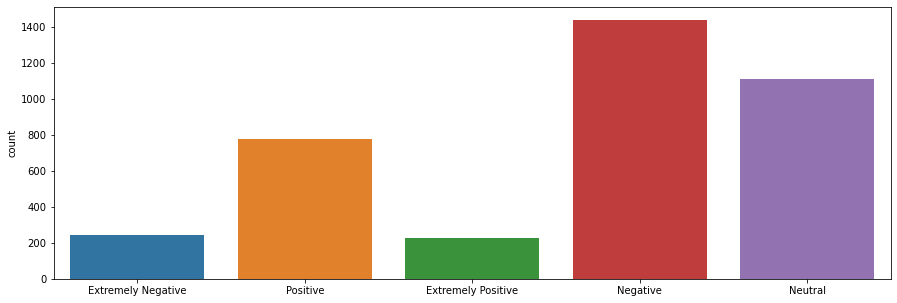

In [191]:
plt.figure(figsize=(15,5))
sns.countplot(x = result['Sentiment'].values)